In [1]:
# pip install pillow 

In [ ]:
# With the overall dataset, we have the created the model below.

In [40]:
# import dependencies.
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# import unzipped file
import zipfile
with zipfile.ZipFile('archive (1).zip',"r") as zip_ref:
    zip_ref.extractall("targetdir")

In [4]:
# load the dataset
train_path = 'targetdir/train/'
test_path = 'targetdir/test/'

In [5]:
# scale the images
train_gen = ImageDataGenerator(rescale = 1/255)
test_gen = ImageDataGenerator(rescale = 1/255)

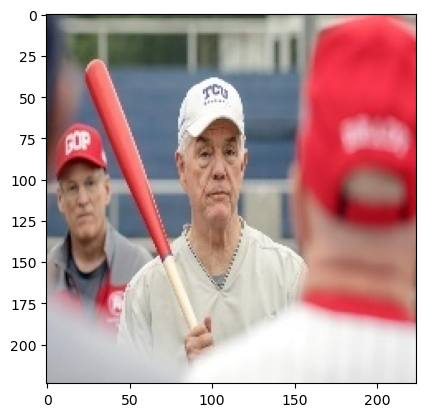

In [6]:
# display the image
plt.imshow(plt.imread(train_path + 'baseball/001.jpg'));

In [7]:
# training and test data for the model.
train_data = train_gen.flow_from_directory(
    train_path,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_path,
    class_mode='categorical'
)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [17]:
# create neural network
model = Sequential()

model.add(Conv2D(
    filters=16,
    kernel_size=(3,3),
    activation='relu'))

model.add(MaxPool2D(
      pool_size=(2,2)))

model.add(Flatten())
'''model.add(Dense(
    units=100,
    activation='relu'))'''

# output layer
model.add(Dense(100,
    activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# fit the model
history = model.fit(
    train_data,
    batch_size=32,
    validation_data=test_data,
    epochs=1
)

425/425 [==============================] - 314s 739ms/step - loss: 5.5879 - accuracy: 0.1595 - val_loss: 3.3604 - val_accuracy: 0.2620


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, None, None, 16)    448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 16)   0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               25806500  
                                                                 
Total params: 25,806,948
Trainable params: 25,806,948
Non-trainable params: 0
_________________________________________________________________


16/16 [==============================] - 3s 194ms/step


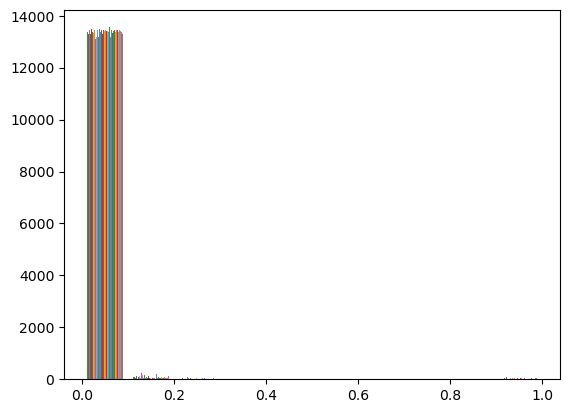

(array([[494.,   3.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.],
        [495.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [493.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [498.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [496.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [488.,   1.,   4.,   3.,   1.,   1.,   1.,   0.,   0.,   1.],
        [496.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [495.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [499.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [483.,  11.,   4.,   0.,   0.,   0.,   1.,   0.,   1.,   0.],
        [488.,   3.,   1.,   1.,   1.,   0.,   2.,   1.,   1.,   2.],
        [494.,   5.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [500.,   0.,

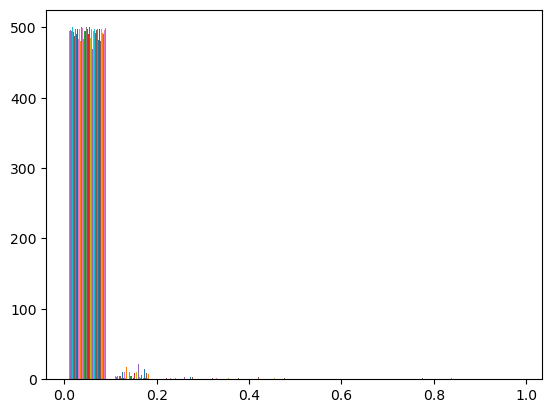

In [21]:
# prediction on training and testing dataset
train_preds = model.predict(train_data)
test_preds = model.predict(test_data)

# histogram
plt.hist(train_preds)
plt.show()
plt.hist(test_preds)

In [13]:
type(preds)

numpy.ndarray

In [32]:
# valide dataset
valid_path = 'targetdir/valid/'
valid_gen = ImageDataGenerator(rescale = 1/255)
valid_data = valid_gen.flow_from_directory(
    valid_path,
    class_mode='categorical'
)
pred2 = model.predict(valid_data)
pred2

Found 505 images belonging to 100 classes.
16/16 [==============================] - 2s 120ms/step


array([[0.0002881 , 0.04299286, 0.01691611, ..., 0.00856763, 0.01371404,
        0.00037829],
       [0.00043389, 0.00076665, 0.00096052, ..., 0.0009095 , 0.00381123,
        0.00124991],
       [0.0018677 , 0.00036906, 0.00055786, ..., 0.02124332, 0.00359804,
        0.00223785],
       ...,
       [0.00495028, 0.00770112, 0.01507171, ..., 0.01453444, 0.01186035,
        0.02442287],
       [0.00645224, 0.01154285, 0.01066631, ..., 0.00954773, 0.01709786,
        0.0044278 ],
       [0.00179648, 0.00399759, 0.00671352, ..., 0.00586491, 0.02805788,
        0.00033698]], dtype=float32)

In [62]:
pred2.shape

(505, 100)

In [73]:
model.predict(test_data)

16/16 [==============================] - 3s 157ms/step


array([[1.5173949e-03, 8.9369435e-04, 1.4510692e-02, ..., 8.4228128e-02,
        6.4826240e-03, 1.6174043e-03],
       [5.6737929e-04, 6.2555247e-03, 7.5467401e-03, ..., 2.7655300e-03,
        1.0811608e-02, 1.1446526e-02],
       [3.4106895e-04, 8.1203813e-03, 1.0042492e-02, ..., 1.3704426e-03,
        2.7623570e-03, 4.2574302e-06],
       ...,
       [1.2324279e-03, 1.9734366e-04, 6.1060512e-03, ..., 5.3694602e-02,
        1.7097820e-02, 7.1930909e-04],
       [7.9814548e-05, 4.1739820e-04, 3.9773606e-04, ..., 1.2618690e-02,
        2.7753864e-03, 4.5069424e-03],
       [3.0444225e-04, 1.5393184e-02, 9.3075936e-04, ..., 8.3244573e-03,
        7.8207557e-04, 8.1970193e-04]], dtype=float32)

In [74]:
test_preds_m2 = model.predict(test_data)

16/16 [==============================] - 3s 177ms/step


In [75]:
y_preds = test_preds_m2.argmax(axis = -1)

In [76]:
preds_dict = {v:k for k,v in test_data.class_indices.items()}

In [81]:
import pandas as pd

In [83]:
test_sports_preds = pd.Series(y_preds).map(preds_dict)

In [85]:
test_sports_preds

0              nascar racing
1               field hockey
2      wheelchair basketball
3      wheelchair basketball
4            steer wrestling
               ...          
495                  mushing
496             horse racing
497              bull riding
498                disc golf
499            weightlifting
Length: 500, dtype: object

In [ ]:
np.argmax(test_data,axis=1)

In [99]:
test_data.class_indices

{'air hockey': 0,
 'ampute football': 1,
 'archery': 2,
 'arm wrestling': 3,
 'axe throwing': 4,
 'balance beam': 5,
 'barell racing': 6,
 'baseball': 7,
 'basketball': 8,
 'baton twirling': 9,
 'bike polo': 10,
 'billiards': 11,
 'bmx': 12,
 'bobsled': 13,
 'bowling': 14,
 'boxing': 15,
 'bull riding': 16,
 'bungee jumping': 17,
 'canoe slamon': 18,
 'cheerleading': 19,
 'chuckwagon racing': 20,
 'cricket': 21,
 'croquet': 22,
 'curling': 23,
 'disc golf': 24,
 'fencing': 25,
 'field hockey': 26,
 'figure skating men': 27,
 'figure skating pairs': 28,
 'figure skating women': 29,
 'fly fishing': 30,
 'football': 31,
 'formula 1 racing': 32,
 'frisbee': 33,
 'gaga': 34,
 'giant slalom': 35,
 'golf': 36,
 'hammer throw': 37,
 'hang gliding': 38,
 'harness racing': 39,
 'high jump': 40,
 'hockey': 41,
 'horse jumping': 42,
 'horse racing': 43,
 'horseshoe pitching': 44,
 'hurdles': 45,
 'hydroplane racing': 46,
 'ice climbing': 47,
 'ice yachting': 48,
 'jai alai': 49,
 'javelin': 50,
 '

In [95]:
test_sports_preds

0              nascar racing
1               field hockey
2      wheelchair basketball
3      wheelchair basketball
4            steer wrestling
               ...          
495                  mushing
496             horse racing
497              bull riding
498                disc golf
499            weightlifting
Length: 500, dtype: object

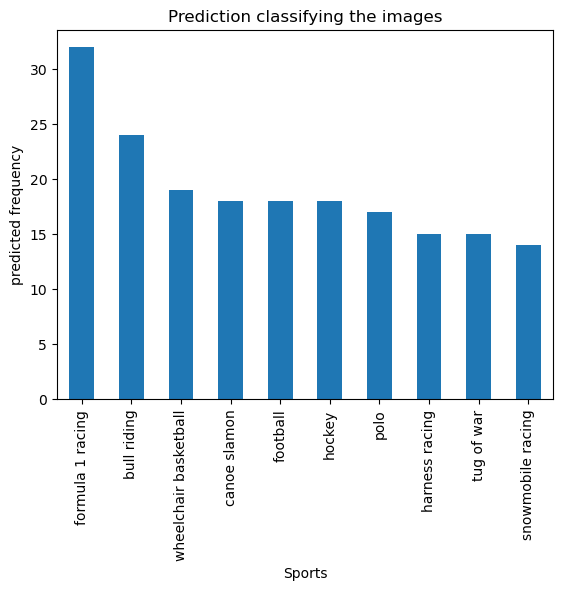

In [105]:
# bar plot showing top 10 sports predicted by the model.
test_sports_preds.value_counts().head(10).plot(kind='bar')
plt.xlabel('Sports')
plt.ylabel('predicted frequency')
plt.title('Prediction classifying the images')
plt.show()

**Interpretation**
- Our model is predicting formula 1 racing more than 30 times.
- Our model is classifying images of bull riding around 24 times.

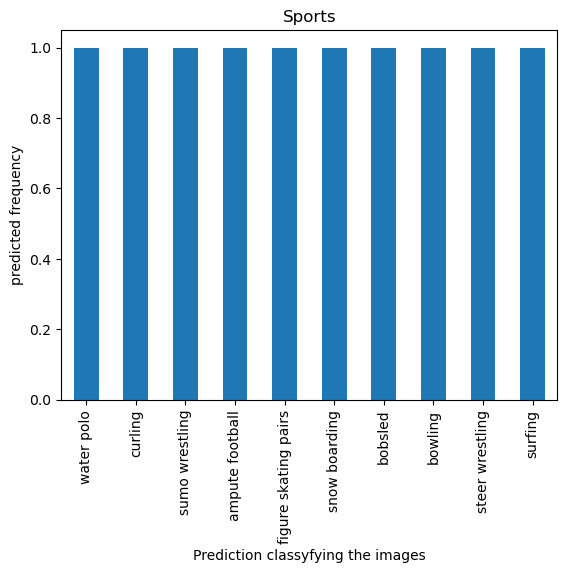

In [107]:
# bar plot showing last 10 sports predicted by the model.
test_sports_preds.value_counts().tail(10).plot(kind='bar')
plt.xlabel('Prediction classyfying the images')
plt.ylabel('predicted frequency')
plt.title('Sports')
plt.show()

**Interpretation**
- Our model is predicting water polo 1 time.